In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
agriculture_data = pd.read_csv('faostat_cleaned_long.csv')
climate_data = pd.read_csv('world_bank_cleaned_long.csv')

In [3]:
agriculture_data.head()

,Area,Item,Element,Unit,Year,Value
0,Argentina,"Almonds, in shell",Area harvested,ha,2015,382.00
1,Argentina,"Almonds, in shell",Yield,kg/ha,2015,1873.50
2,Argentina,"Almonds, in shell",Production,t,2015,714.86
3,Argentina,"Anise, badian, coriander, cumin, caraway, fenn...",Area harvested,ha,2015,8431.00
4,Argentina,"Anise, badian, coriander, cumin, caraway, fenn...",Yield,kg/ha,2015,864.70


In [4]:
agriculture_data = agriculture_data.drop(['Item'], axis=1)

In [5]:
agriculture_data.head(3)

,Area,Element,Unit,Year,Value
0,Argentina,Area harvested,ha,2015,382.00
1,Argentina,Yield,kg/ha,2015,1873.50
2,Argentina,Production,t,2015,714.86


In [6]:
climate_data['Country Name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
       'Dominican Republic', 'Ecuador', 'Guatemala', 'Honduras', 'Mexico',
       'Nicaragua', 'Panama', 'Peru', 'Paraguay', 'El Salvador',
       'Uruguay'], dtype=object)

In [7]:
agriculture_data['Area'].unique()

array(['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile',
       'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua',
       'Panama', 'Paraguay', 'Peru', 'Uruguay',
       'Venezuela (Bolivarian Republic of)'], dtype=object)

In [8]:
selected_areas = [
    'Argentina', 'Brazil', 'Chile',
    'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador',
    'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua',
    'Panama', 'Paraguay', 'Peru', 'Uruguay'
]

filtered_data = agriculture_data[
    (agriculture_data['Area'].isin(selected_areas)) &
    (agriculture_data['Year'].between(2015, 2021))
]

mean_values = filtered_data.groupby(['Area', 'Year'])['Value'].mean().reset_index()
mean_values.columns = ['Area', 'Year', 'Mean_Value']

In [9]:
agriculture_data = pd.DataFrame(mean_values)
agriculture_data

,Area,Year,Mean_Value
0,Argentina,2015,1.869397e+06
1,Argentina,2016,1.843597e+06
2,Argentina,2017,1.920357e+06
3,Argentina,2018,1.824229e+06
4,Argentina,2019,1.996182e+06
...,...,...,...
114,Uruguay,2017,3.232512e+05
115,Uruguay,2018,2.980969e+05
116,Uruguay,2019,3.148048e+05
117,Uruguay,2020,3.033500e+05


In [10]:
agriculture_data['Mean_Value'] = agriculture_data['Mean_Value'].map('{:,.2f}'.format)
agriculture_data

,Area,Year,Mean_Value
0,Argentina,2015,"1,869,396.88"
1,Argentina,2016,"1,843,597.14"
2,Argentina,2017,"1,920,356.61"
3,Argentina,2018,"1,824,228.87"
4,Argentina,2019,"1,996,182.48"
...,...,...,...
114,Uruguay,2017,"323,251.20"
115,Uruguay,2018,"298,096.94"
116,Uruguay,2019,"314,804.85"
117,Uruguay,2020,"303,349.97"


In [11]:
agriculture_data = agriculture_data[~agriculture_data['Area'].isin(['Bolivia (Plurinational State of)', 'Venezuela (Bolivarian Republic of)'])]
agriculture_data.head()

,Area,Year,Mean_Value
0,Argentina,2015,"1,869,396.88"
1,Argentina,2016,"1,843,597.14"
2,Argentina,2017,"1,920,356.61"
3,Argentina,2018,"1,824,228.87"
4,Argentina,2019,"1,996,182.48"


In [12]:
agriculture_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Area        119 non-null    object
 1   Year        119 non-null    int64 
 2   Mean_Value  119 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.7+ KB


In [13]:
agriculture_data['Mean_Value'] = agriculture_data['Mean_Value'].replace(',', '', regex=True).astype(float)
agriculture_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        119 non-null    object 
 1   Year        119 non-null    int64  
 2   Mean_Value  119 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


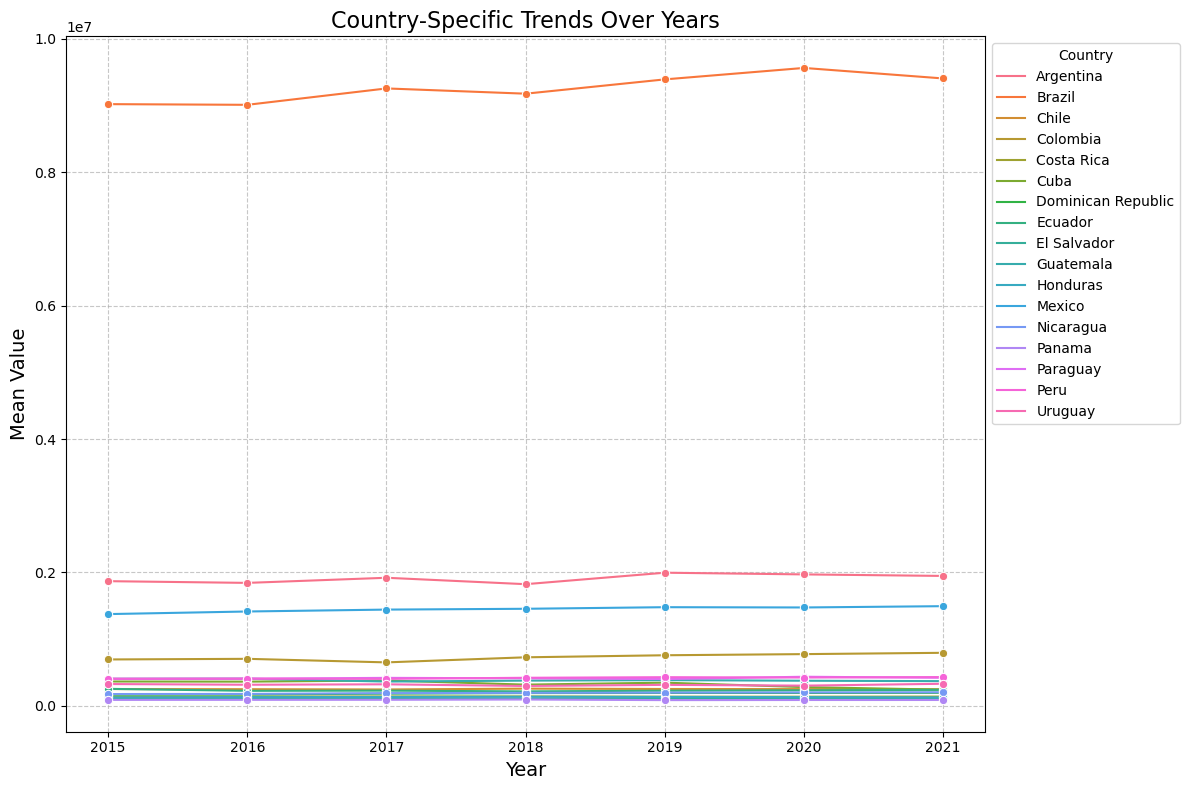

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.lineplot(data=agriculture_data, x='Year', y='Mean_Value', hue='Area', marker='o')
plt.title('Country-Specific Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


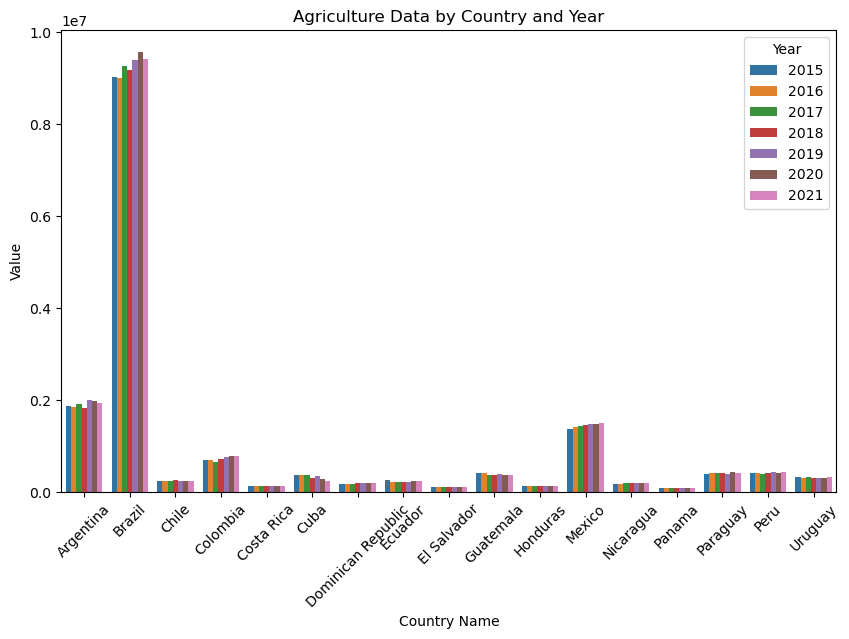

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=agriculture_data, x='Area', y='Mean_Value', hue='Year')
plt.title('Agriculture Data by Country and Year')
plt.ylabel('Value')
plt.xlabel('Country Name')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

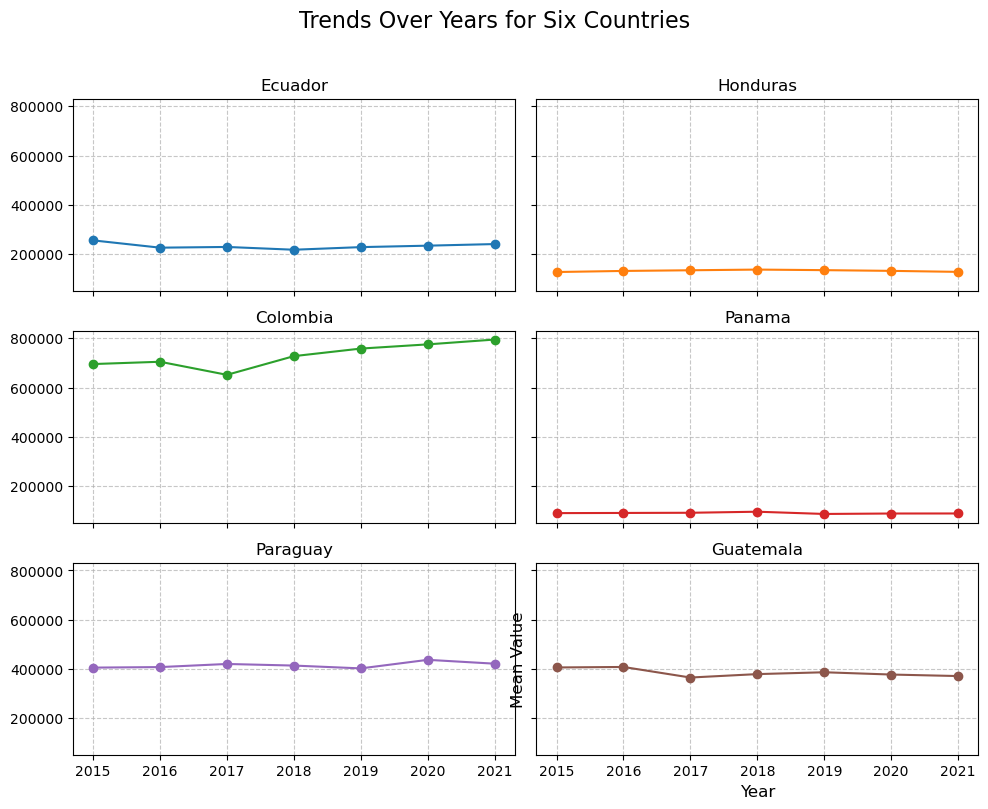

In [16]:
random_countries = random.sample(agriculture_data['Area'].unique().tolist(), 6)

# Filter the dataset for these countries
filtered_data = agriculture_data[agriculture_data['Area'].isin(random_countries)]

# Set up the figure and axes for a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Define a color palette (you can adjust this to use more colors if needed)
colors = plt.cm.tab10.colors  # Use a built-in Matplotlib colormap

# Plot each country's trend in its own subplot
for i, country in enumerate(random_countries):
    country_data = filtered_data[filtered_data['Area'] == country]
    axes[i].plot(
        country_data['Year'], 
        country_data['Mean_Value'], 
        marker='o', 
        color=colors[i % len(colors)]  # Assign a unique color
    )
    axes[i].set_title(country, fontsize=12)
    axes[i].grid(axis='both', linestyle='--', alpha=0.7)

# Adjust layout
fig.suptitle('Trends Over Years for Six Countries', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.show()


In [17]:
climate_data['Country Name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
       'Dominican Republic', 'Ecuador', 'Guatemala', 'Honduras', 'Mexico',
       'Nicaragua', 'Panama', 'Peru', 'Paraguay', 'El Salvador',
       'Uruguay'], dtype=object)

In [18]:
climate_data = climate_data.drop(['Indicator Code','Country Code','Indicator Name'], axis=1)
climate_data.head(10)

,Country Name,Year,Value
0,Argentina,2015,591.0
1,Brazil,2015,1761.0
2,Chile,2015,1522.0
3,Colombia,2015,3240.0
4,Costa Rica,2015,2926.0
5,Cuba,2015,1335.0
6,Dominican Republic,2015,1410.0
7,Ecuador,2015,2274.0
8,Guatemala,2015,1996.0
9,Honduras,2015,1976.0


In [19]:
climate_data.shape

(119, 3)

In [20]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  119 non-null    object 
 1   Year          119 non-null    int64  
 2   Value         119 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


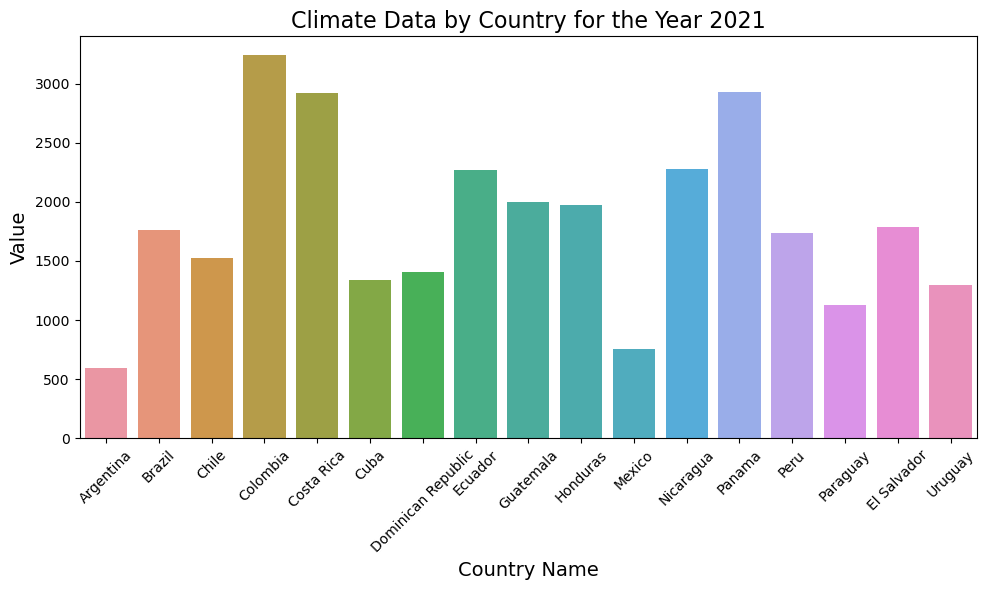

In [21]:
climate_data_2021 = climate_data[climate_data['Year'] == 2021]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=climate_data_2021, x='Country Name', y='Value')
plt.title('Climate Data by Country for the Year 2021', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Country Name', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [22]:
combined_data = pd.concat([agriculture_data, climate_data], axis=1)
combined_data.head()

,Area,Year,Mean_Value,Country Name,Year,Value
0,Argentina,2015,1869396.88,Argentina,2015,591.0
1,Argentina,2016,1843597.14,Brazil,2015,1761.0
2,Argentina,2017,1920356.61,Chile,2015,1522.0
3,Argentina,2018,1824228.87,Colombia,2015,3240.0
4,Argentina,2019,1996182.48,Costa Rica,2015,2926.0


In [23]:
combined_data.shape

(119, 6)

In [24]:
cor = combined_data[['Mean_Value','Value']].corr()
cor

,Mean_Value,Value
Mean_Value,1.000000,0.058784
Value,0.058784,1.000000


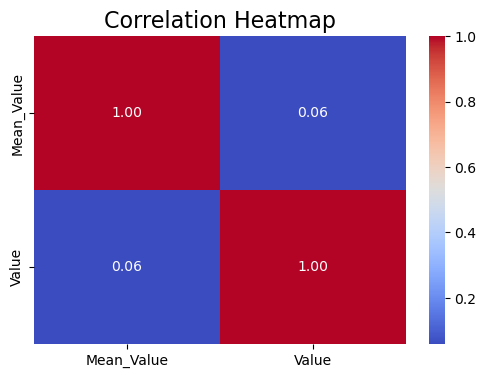

In [25]:
cor = combined_data[['Mean_Value', 'Value']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cor, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()
